<a href="https://colab.research.google.com/github/kentaojapi/dataanalytics-spotify-artist-data/blob/master/SpotifyAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Refernces

https://github.com/UWGabrielXu/Spotify-Music-Data-Analysis/blob/gh-pages/backup.md

* json checker
http://kimihiro-n.site44.com/json_dump/
* curl command to python code
https://curl.trillworks.com/
* Spotify API Audio Features explation
https://developer.spotify.com/documentation/web-api/reference/object-model/

# Visualize Audio Features of an Artist

In [3]:
# download jp-font
!apt-get -y install fonts-ipafont-gothic
# rm cachefile
!rm /root/.cache/matplotlib/fontlist-v300.json

### その後ラインタイムをリセットすること ###

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'AppleGothic'

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

In [0]:
!mkdir audio-features
!ls ../content/audio-features/

In [0]:
from google.cloud import storage


def download_blob(bucket_name, source_blob_name, destination_file_name):
    """
    Downloads a blob from the bucket.
    refer : https://github.com/GoogleCloudPlatform/python-docs-samples/blob/master/storage/cloud-client/snippets.py
    """
    storage_client = storage.Client('atomic-lens-188216')
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)


bucket_name = "spotify-analysis"
artist_name = "gaudies"
source_blob_name = "audio-features_{}.csv".format(artist_name)
destination_file_name = "../content/audio-features/audio-features_{}.csv".format(artist_name)
download_blob(bucket_name, source_blob_name, destination_file_name)

In [7]:
#df = pd.read_csv('audio_features_zaningen.csv')
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv(destination_file_name)
#df_zaningen = pd.read_csv('drive/My Drive/machine_learning/dataanalysis-spotify/audio_features_zaningen.csv')

In [9]:
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,name
0,0.000571,https://api.spotify.com/v1/audio-analysis/2W53...,0.496,220093,0.693,2W53mNmiU1NWS5vqHxcJqT,0.000061,11,0.0795,-2.883,0,0.0353,122.019,4,https://api.spotify.com/v1/tracks/2W53mNmiU1NW...,audio_features,spotify:track:2W53mNmiU1NWS5vqHxcJqT,0.688,哲学の先生
1,0.010900,https://api.spotify.com/v1/audio-analysis/5Q9Q...,0.527,200840,0.835,5Q9QkpgfVavSohqVSPKqN2,0.000041,9,0.0999,-5.341,1,0.0259,99.990,4,https://api.spotify.com/v1/tracks/5Q9QkpgfVavS...,audio_features,spotify:track:5Q9QkpgfVavSohqVSPKqN2,0.562,ギターの教本
2,0.015600,https://api.spotify.com/v1/audio-analysis/6rKN...,0.288,289027,0.841,6rKNtTTC2rQhHyrKBhniQa,0.000002,7,0.3000,-4.076,1,0.0326,182.027,4,https://api.spotify.com/v1/tracks/6rKNtTTC2rQh...,audio_features,spotify:track:6rKNtTTC2rQhHyrKBhniQa,0.465,悪い癖
3,0.257000,https://api.spotify.com/v1/audio-analysis/4WjB...,0.498,196973,0.710,4WjB9MQVr8WcsnJbhsttqh,0.000002,9,0.1190,-4.361,0,0.0309,82.920,4,https://api.spotify.com/v1/tracks/4WjB9MQVr8Wc...,audio_features,spotify:track:4WjB9MQVr8WcsnJbhsttqh,0.282,新しい人
4,0.133000,https://api.spotify.com/v1/audio-analysis/1S71...,0.590,215573,0.757,1S71jMRsHowXcqt13hNVc0,0.014200,10,0.4220,-5.796,1,0.0323,114.088,4,https://api.spotify.com/v1/tracks/1S71jMRsHowX...,audio_features,spotify:track:1S71jMRsHowXcqt13hNVc0,0.639,2102


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


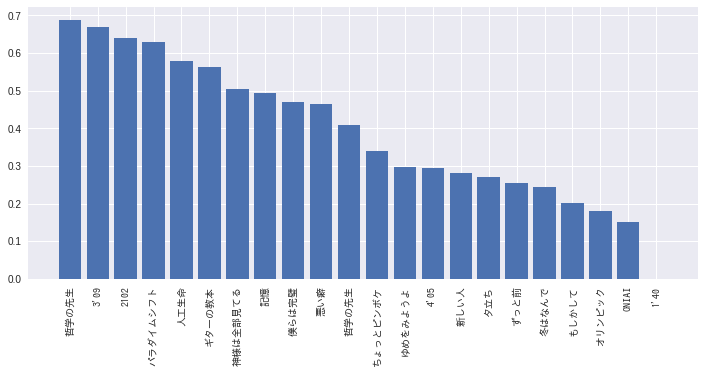

In [18]:
df_valence = df[['valence', 'name']]
df_valence.sort_values('valence', ascending=False, inplace=True)
xlabel = df_valence['name']

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

# jp-font
ticks_font = font_manager.FontProperties(family='IPAGothic', style='normal', weight='normal', stretch='normal')

plt.bar(range(len(df_valence)), df_valence['valence'], tick_label=xlabel, align="center", axes=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontproperties(ticks_font)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


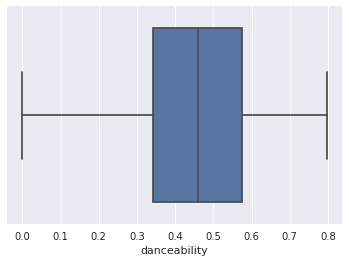

In [25]:
sns.boxplot(df['danceability'])

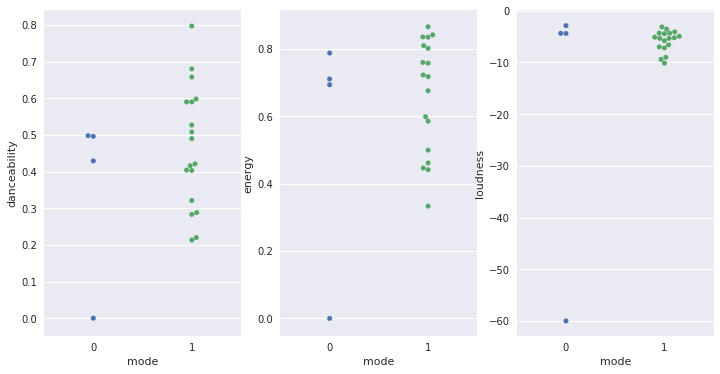

In [26]:
fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(12, 6)

sns.swarmplot(y='danceability', x='mode', data=df, ax=ax[0])
sns.swarmplot(y='energy', x='mode', data=df, ax=ax[1])
sns.swarmplot(y='loudness', x='mode', data=df, ax=ax[2])

(0.7, 1.0)

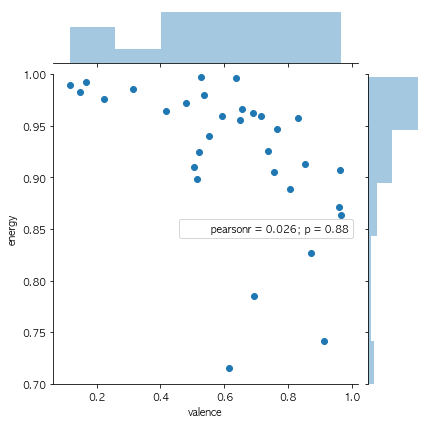

In [0]:
sns.jointplot(x='valence', y='energy', data=df)
plt.ylim([0.7, 1.0])

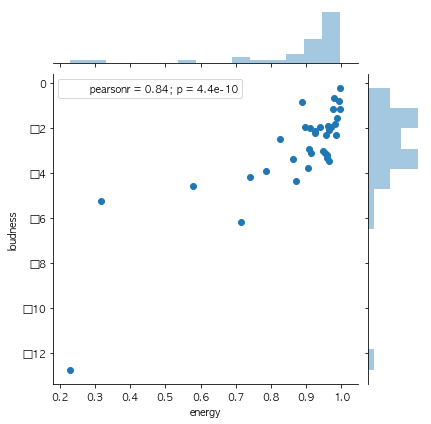

In [0]:
sns.jointplot(x='energy', y='loudness', data=df)

/Users/kentaojapi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


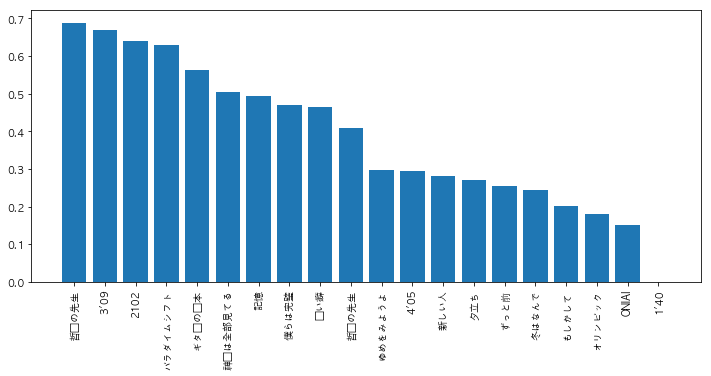

In [0]:
df_gaudies = pd.read_csv('audio_features_ガウディーズ.csv')

df_valence_gaudies = df_gaudies[['valence', 'name']]
df_valence_gaudies.sort_values('valence', ascending=False, inplace=True)
xlabel = df_valence_gaudies['name']

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

plt.bar(range(len(df_valence_gaudies)), df_valence_gaudies['valence'], tick_label=xlabel, align="center", axes=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)


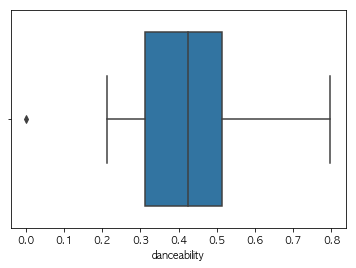

In [0]:
sns.boxplot(df_gaudies['danceability'])

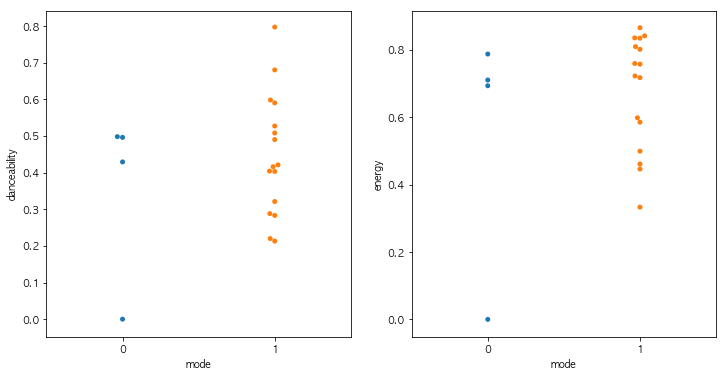

In [0]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(12, 6)
sns.swarmplot(y='danceability', x='mode', data=df_gaudies, ax=ax[0])
sns.swarmplot(y='energy', x='mode', data=df_gaudies, ax=ax[1])

# Edit top200.csv 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'AppleGothic'

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
!mkdir audio-features
!ls ../content/audio-features/

mkdir: cannot create directory ‘audio-features’: File exists
audio-features_gaudies.csv


In [0]:
from google.cloud import storage


def download_blob(bucket_name, source_blob_name, destination_file_name):
    storage_client = storage.Client('atomic-lens-188216')
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)


bucket_name = "spotify-analysis"
source_blob_name = "top200.csv"
destination_file_name = "../content/audio-features/top200.csv"
download_blob(bucket_name, source_blob_name, destination_file_name)

In [15]:
df = pd.read_csv('../content/audio-features/top200.csv', skiprows=1)
df.head()

,Position,Track Name,Artist,Streams,URL
0,1,7 rings,Ariana Grande,4343924,https://open.spotify.com/track/6ocbgoVGwYJhOv1...
1,2,Con Calma,Daddy Yankee,4342484,https://open.spotify.com/track/5w9c2J52mkdntKO...
2,3,Sucker,Jonas Brothers,3696002,https://open.spotify.com/track/4y3OI86AEP6PQoD...
3,4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3372917,https://open.spotify.com/track/3KkXRkHbMCARz0a...
4,5,Wow.,Post Malone,3269784,https://open.spotify.com/track/6MWtB6iiXyIwun0...


In [55]:
# Count duplications.
print(df.duplicated(subset='Artist').value_counts())

False    125
True      75
dtype: int64


In [16]:
df_nonduplicate = df.drop_duplicates(subset='Artist')
df_nonduplicate.to_csv('../content/audio-features/top200_nonduplicate.csv')
df_nonduplicate.head()

,Position,Track Name,Artist,Streams,URL
0,1,7 rings,Ariana Grande,4343924,https://open.spotify.com/track/6ocbgoVGwYJhOv1...
1,2,Con Calma,Daddy Yankee,4342484,https://open.spotify.com/track/5w9c2J52mkdntKO...
2,3,Sucker,Jonas Brothers,3696002,https://open.spotify.com/track/4y3OI86AEP6PQoD...
3,4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3372917,https://open.spotify.com/track/3KkXRkHbMCARz0a...
5,6,Shallow,Lady Gaga,3189842,https://open.spotify.com/track/2VxeLyX666F8uXC...


In [57]:
from google.cloud import storage


def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client('atomic-lens-188216')
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(source_file_name)

    print('File {} uploaded to {}.'.format(
        source_file_name,
        destination_blob_name))

bucket_name = "spotify-analysis"
source_file_name = '../content/audio-features/top200_nonduplicate.csv'
destination_file_name =  'top200_nonduplicate.csv'
upload_blob(bucket_name, source_file_name, destination_file_name)

File ../content/audio-features/top200_nonduplicate.csv uploaded to top200_nonduplicate.csv.


In [0]:
# df_artists = df_nonduplicate.loc[:, ["Artist"]]
# artists = df_artists.values.tolist()
# artists

# Analyze top 200 Chart

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'AppleGothic'

In [0]:
from google.cloud import storage


def download_blob(bucket_name, source_blob_name, destination_file_name):
    storage_client = storage.Client('atomic-lens-188216')
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)


bucket_name = "spotify-analysis"
source_blob_name = "audio-features_{}.csv".format(artist_name)
destination_file_name = "../content/audio-features/audio-features_{}.csv".format(artist_name)
download_blob(bucket_name, source_blob_name, destination_file_name)

In [0]:
a = pd.DataFrame

pandas.core.frame.DataFrame